In [1]:
import pandas as pd
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
sample = pd.read_csv("sample_submission.csv",encoding = "ISO-8859-1")
sample.head(2)

,id,target
0,0,0
1,2,0


In [4]:
sample.shape

(3263, 2)

In [5]:
sample.target.value_counts()

0    3263
Name: target, dtype: int64

In [8]:
pred.shape

(3263, 2)

In [9]:
pred.target.value_counts()

0    2158
1    1105
Name: target, dtype: int64

In [3]:
test_limpio = pd.read_csv("test_limpio.csv",encoding = "ISO-8859-1")
test_limpio.head(2)

,id,keyword,location,text,cantidad_links,cantidad_signos_pregunta,repeticiones,longitud_tweet,the,a,...,plans to,police post,provoke outrage,read by,rescuers are,letras_seguidas,insultos_por_tweet,expresiones_por_tweet,kill,died
0,0,NaN,NaN,"['just', 'happened', 'a', 'terrible', 'car', '...",0,0,1,40,0,1,...,0,0,0,0,0,2,0,0,0,0
1,2,NaN,NaN,"['heard', 'about', 'earthquake', 'is', 'differ...",0,0,1,70,0,0,...,0,0,0,0,0,2,0,0,0,0


In [4]:
test_limpio_sin_texto = test_limpio.drop(['text','keyword','location'], axis=1)
test_limpio_sin_texto.head()

,id,cantidad_links,cantidad_signos_pregunta,repeticiones,longitud_tweet,the,a,to,in,of,...,plans to,police post,provoke outrage,read by,rescuers are,letras_seguidas,insultos_por_tweet,expresiones_por_tweet,kill,died
0,0,0,0,1,40,0,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1,2,0,0,1,70,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,3,0,0,1,100,1,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,9,0,0,1,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,11,0,0,1,50,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,0


In [5]:
train_limpio = pd.read_csv("train_limpio.csv",encoding = "ISO-8859-1")
train_limpio.head(2)

,text,target,cantidad_links,cantidad_signos_pregunta,repeticiones,longitud_tweet,the,a,to,in,...,plans to,police post,provoke outrage,read by,rescuers are,letras_seguidas,insultos_por_tweet,expresiones_por_tweet,kill,died
0,"['our', 'deeds', 'are', 'the', 'reason', 'of',...",1,0,0,1,70,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1,"['forest', 'fire', 'near', 'la', 'ronge', 'sas...",1,0,0,1,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
df_x=train_limpio.drop(['text', 'target'], axis=1)
df_x.head()

,cantidad_links,cantidad_signos_pregunta,repeticiones,longitud_tweet,the,a,to,in,of,and,...,plans to,police post,provoke outrage,read by,rescuers are,letras_seguidas,insultos_por_tweet,expresiones_por_tweet,kill,died
0,0,0,1,70,1,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,0
1,0,0,1,40,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,130,0,0,1,2,0,0,...,0,0,0,0,0,2,0,0,0,0
3,0,0,1,60,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,90,0,1,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [7]:
df_y=train_limpio.target
df_y

0       1
1       1
2       1
3       1
4       1
       ..
7129    1
7130    1
7131    1
7132    1
7133    1
Name: target, Length: 7134, dtype: int64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [9]:
rf= RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

## Error de entrenamiento

In [10]:
pred = rf.predict(x_train)
pred

array([1, 0, 0, ..., 0, 1, 0])

In [11]:
y_train.values

array([1, 0, 0, ..., 0, 1, 1])

In [12]:
count = 0
for i in range( len(pred)):
    if pred[i]==y_train.values[i]:
        count = count+1
print(count)
print(len(pred))
print(count/len(pred))

5638
5707
0.9879095847205187


### Bastante bien...demasiado quizas, overfitting?

## Error de test

In [13]:
pred = rf.predict(x_test)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [14]:
y_test.values

array([1, 0, 0, ..., 0, 0, 0])

In [15]:
count = 0
for i in range( len(pred)):
    if pred[i]==y_test.values[i]:
        count = count+1
print(count)
print(len(pred))
print(count/len(pred))

1042
1427
0.7302032235459005


In [16]:
#0.7365101611772951

In [17]:
#
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

In [18]:
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [19]:
train_sin_texto = train_limpio.drop('text',axis=1)

In [20]:
for train_index,test_index in kf.split(train_sin_texto):
    x_train,x_test = train_sin_texto.drop(['target'], axis=1).loc[train_index], train_sin_texto.drop([ 'target'], axis=1).loc[test_index]
    y_train,y_test = train_sin_texto.target[train_index], train_sin_texto.target[test_index]
    
    rf= RandomForestClassifier(n_estimators=50)
    rf.fit(x_train, y_train)
    
    #error de entrenamiento:
    pred = rf.predict(x_train)
    print('Error de entrenamiento: ',f1_score(y_train.values, pred, average='macro'))
    
    
        
    #error de test:
    pred = rf.predict(x_test)
    print('Error de test: ',f1_score(y_test.values, pred, average='macro'))
    
    
    
    
    #x_train = train.drop['target']
    #x_test = test.drop['target']
    #y_train = train.target
    #y_test = test.target
    #print(train,test)

Error de entrenamiento:  0.9851233332055088
Error de test:  0.6921053859252175
Error de entrenamiento:  0.9836080724097243
Error de test:  0.684175233212653
Error de entrenamiento:  0.9849705045823238
Error de test:  0.6801843820415283
Error de entrenamiento:  0.9855937861685706
Error de test:  0.6850911923151815
Error de entrenamiento:  0.9834935790337681
Error de test:  0.7007313425302379


In [21]:
#!pip3 install bayesian-optimization
#from bayes_opt import BayesianOptimization

In [22]:
#Optimizo los n_estimators

In [23]:
best_score = 0
best_value = 0
current_score=[]
for i in range(1,101):
    print('Estoy en la iteracion',i)
    current_score = []
    for train_index,test_index in kf.split(train_sin_texto):
        x_train,x_test = train_sin_texto.drop(['target'], axis=1).loc[train_index], train_sin_texto.drop([ 'target'], axis=1).loc[test_index]
        y_train,y_test = train_sin_texto.target[train_index], train_sin_texto.target[test_index]
    
        rf= RandomForestClassifier(n_estimators=i)
        rf.fit(x_train, y_train)
       
        #error de test:
        pred = rf.predict(x_test)
        score = f1_score(y_test.values, pred, average='macro')
        current_score.append(score)
        
    print('El error total es:', sum(current_score)/len(current_score))
    if(sum(current_score)/len(current_score)>best_score):
        best_score = sum(current_score)/len(current_score)
        best_value = i
    print('')
    

print('Termine todo y la mejor iteracion vue la', best_value)    

Estoy en la iteracion 1
El error total es: 0.621430686901447

Estoy en la iteracion 2
El error total es: 0.5924098759904506

Estoy en la iteracion 3
El error total es: 0.6446597865214074

Estoy en la iteracion 4
El error total es: 0.6374473518164951

Estoy en la iteracion 5
El error total es: 0.6633382374806998

Estoy en la iteracion 6
El error total es: 0.6525361671070045

Estoy en la iteracion 7
El error total es: 0.672981667088391

Estoy en la iteracion 8
El error total es: 0.6516756293248395

Estoy en la iteracion 9
El error total es: 0.6743825743297372

Estoy en la iteracion 10


KeyboardInterrupt: 

In [ ]:
#Optimizo los 
best_score = 0
best_min_samples_split = 0
current_score=[]
for i in range(2,21):
    print('Estoy en la iteracion',i)
    current_score = []
    for train_index,test_index in kf.split(train_sin_texto):
        x_train,x_test = train_sin_texto.drop(['target'], axis=1).loc[train_index], train_sin_texto.drop([ 'target'], axis=1).loc[test_index]
        y_train,y_test = train_sin_texto.target[train_index], train_sin_texto.target[test_index]
    
        rf= RandomForestClassifier(n_estimators=best_value, min_samples_split=i)
        rf.fit(x_train, y_train)
       
        #error de test:
        pred = rf.predict(x_test)
        score = f1_score(y_test.values, pred, average='macro')
        current_score.append(score)
        
    print('El error total es:', sum(current_score)/len(current_score))
    if(sum(current_score)/len(current_score)>best_score):
        best_score = sum(current_score)/len(current_score)
        best_min_samples_splite = i
    print('')
    

print('Termine todo y la mejor iteracion fue la', best_min_samples_splite)    

In [ ]:

#Optimizo los min_samples_leaf
best_score = 0
best_min_samples_leaf = 1
current_score=[]
for i in range(1,10):
    print('Estoy en la iteracion',i)
    current_score = []
    for train_index,test_index in kf.split(train_sin_texto):
        x_train,x_test = train_sin_texto.drop(['target'], axis=1).loc[train_index], train_sin_texto.drop([ 'target'], axis=1).loc[test_index]
        y_train,y_test = train_sin_texto.target[train_index], train_sin_texto.target[test_index]
    
        rf= RandomForestClassifier(n_estimators=best_value, min_samples_split=best_min_samples_splite,min_samples_leaf=i)
        rf.fit(x_train, y_train)
       
        #error de test:
        pred = rf.predict(x_test)
        score = f1_score(y_test.values, pred, average='macro')
        current_score.append(score)
        
    print('El error total es:', sum(current_score)/len(current_score))
    if(sum(current_score)/len(current_score)>best_score):
        best_score = sum(current_score)/len(current_score)
        best_min_samples_leaf = i
    print('')
    

print('Termine todo y la mejor iteracion fue la', best_min_samples_leaf)

In [ ]:
#Optimizo los max_features
best_score = 0
best_max_features = 1
current_score=[]
for i in range(1,15):
    print('Estoy en la iteracion',i)
    current_score = []
    for train_index,test_index in kf.split(train_sin_texto):
        x_train,x_test = train_sin_texto.drop(['target'], axis=1).loc[train_index], train_sin_texto.drop([ 'target'], axis=1).loc[test_index]
        y_train,y_test = train_sin_texto.target[train_index], train_sin_texto.target[test_index]
    
        rf= RandomForestClassifier(n_estimators=90, min_samples_split=14,\
                                   min_samples_leaf=1,max_features=best_max_features )
        rf.fit(x_train, y_train)
       
        #error de test:
        pred = rf.predict(x_test)
        score = f1_score(y_test.values, pred, average='macro')
        current_score.append(score)
        
    print('El error total es:', sum(current_score)/len(current_score))
    if(sum(current_score)/len(current_score)>best_score):
        best_score = sum(current_score)/len(current_score)
        best_max_features = i
    print('')
    

print('Termine todo y la mejor iteracion fue la', best_max_features)

In [ ]:
#Optimizo los max_features
best_score = 0
best_n_estimator = 1
current_score=[]
for i in range(1,100):
    print('Estoy en la iteracion',i)
    current_score = []
    for train_index,test_index in kf.split(train_sin_texto):
        x_train,x_test = train_sin_texto.drop(['target'], axis=1).loc[train_index], train_sin_texto.drop([ 'target'], axis=1).loc[test_index]
        y_train,y_test = train_sin_texto.target[train_index], train_sin_texto.target[test_index]
    
        rf= RandomForestClassifier(n_estimators=i, min_samples_split=14,\
                                   min_samples_leaf=1,max_features=8 )
        rf.fit(x_train, y_train)
       
        #error de test:
        pred = rf.predict(x_test)
        score = f1_score(y_test.values, pred, average='macro')
        current_score.append(score)
        
    print('El error total es:', sum(current_score)/len(current_score))
    if(sum(current_score)/len(current_score)>best_score):
        best_score = sum(current_score)/len(current_score)
        best_n_estimator = i
    print('')
    

print('Termine todo y la mejor iteracion fue la', best_n_estimator)

### Ultima prueba con k-folds con los hyperparametros tuneados

In [24]:
for train_index,test_index in kf.split(train_sin_texto):
    x_train,x_test = train_sin_texto.drop(['target'], axis=1).loc[train_index], train_sin_texto.drop([ 'target'], axis=1).loc[test_index]
    y_train,y_test = train_sin_texto.target[train_index], train_sin_texto.target[test_index]
    
    rf= RandomForestClassifier(n_estimators=90,\
                            min_samples_split=14,min_samples_leaf=1)
    rf.fit(x_train, y_train)
    
    #error de entrenamiento:
    pred = rf.predict(x_train)
    print('Error de entrenamiento: ',f1_score(y_train.values, pred, average='macro'))
    
    
        
    #error de test:
    pred = rf.predict(x_test)
    print('Error de test: ',f1_score(y_test.values, pred, average='macro'))

Error de entrenamiento:  0.9403333054533288
Error de test:  0.7199906736660342
Error de entrenamiento:  0.9375057617211873
Error de test:  0.6914729394262566
Error de entrenamiento:  0.9303670442829226
Error de test:  0.6847092829980621
Error de entrenamiento:  0.9363455226662138
Error de test:  0.6984165691247236
Error de entrenamiento:  0.9343197807170922
Error de test:  0.7067095567339045


In [25]:
# Entonces, mi modelo optimizado es:
train_x=train_limpio.drop(['text', 'target'], axis=1)

train_y=train_limpio.target



rf= RandomForestClassifier(n_estimators=90,\
                            min_samples_split=14,min_samples_leaf=1)

rf.fit(train_x, train_y)
    
#error de entrenamiento, es el unico que puedo calcular:
pred = rf.predict(train_x)
print('Error de entrenamiento: ',f1_score(train_y, pred, average='macro'))

Error de entrenamiento:  0.9354849531762099


In [26]:
list(set(train_x.columns.to_list()) - set(test_limpio_sin_texto.columns.to_list()))

[]

In [ ]:
test_limpio_sin_texto.columns.to_list()

In [ ]:
train_x.columns.to_list()

In [ ]:
#Prediccion del text

In [28]:
pred = rf.predict(test_limpio_sin_texto.drop(['id'],axis=1))

In [39]:
pred

array([0, 1, 0, ..., 1, 1, 1])

In [37]:
sample.target=pred

In [40]:
sample.head()

,id,target
0,0,0
1,2,1
2,3,0
3,9,0
4,11,0


In [41]:
sample.to_csv('prediccion_random_forest.csv', index=False)

In [29]:
def Nmaxelements(list1,valores, N): 
    final_list = [] 
    final_values = []

    for i in range(0, N):  
        max1 = 0
        value = 0
          
        for j in range(len(list1)):      
            if list1[j] > max1: 
                #print(j)
                max1 = list1[j]; 
                value = valores[j]
                  
        valores.remove(value)
        final_values.append(value)
        
        
        list1.remove(max1); 
        final_list.append(max1) 
           
    return([final_list,final_values])
  
# Driver code 
N = 30
  
# Calling the function 
values_best_features,best_feaures = Nmaxelements(list(rf.feature_importances_),list(df_x.columns), N) 
values_best_features,best_feaures

([0.03530182701563459,
  0.03088990737883684,
  0.022222636151489786,
  0.019534443967381614,
  0.017510969377203072,
  0.01339239998939303,
  0.01206095186807268,
  0.009116601437645564,
  0.008110925786332903,
  0.007905742743211064,
  0.007891183375721337,
  0.007182504479278175,
  0.006977356375340809,
  0.006800185326699615,
  0.006660284655240325,
  0.006655926773664888,
  0.006487136394364506,
  0.006242867950485976,
  0.006085018320354185,
  0.0060568264691834295,
  0.006053791239041612,
  0.005899798921123218,
  0.005619412083814224,
  0.0055944421245643005,
  0.0053996435609777686,
  0.005357571794868024,
  0.005325168984248459,
  0.005260807351290209,
  0.004998182146872391,
  0.00494655952182241],
 ['cantidad_links',
  'longitud_tweet',
  'in',
  'i',
  'you',
  'cantidad_signos_pregunta',
  'my',
  'hiroshima',
  'california',
  'the',
  'fire',
  'killed',
  'train',
  'repeticiones',
  'fires',
  'suicide',
  'letras_seguidas',
  'accident',
  'earthquake',
  'wildfire',

In [30]:
rf.feature_importances_[0,]

0.03530182701563459

In [31]:
df_x.columns[0]

'cantidad_links'

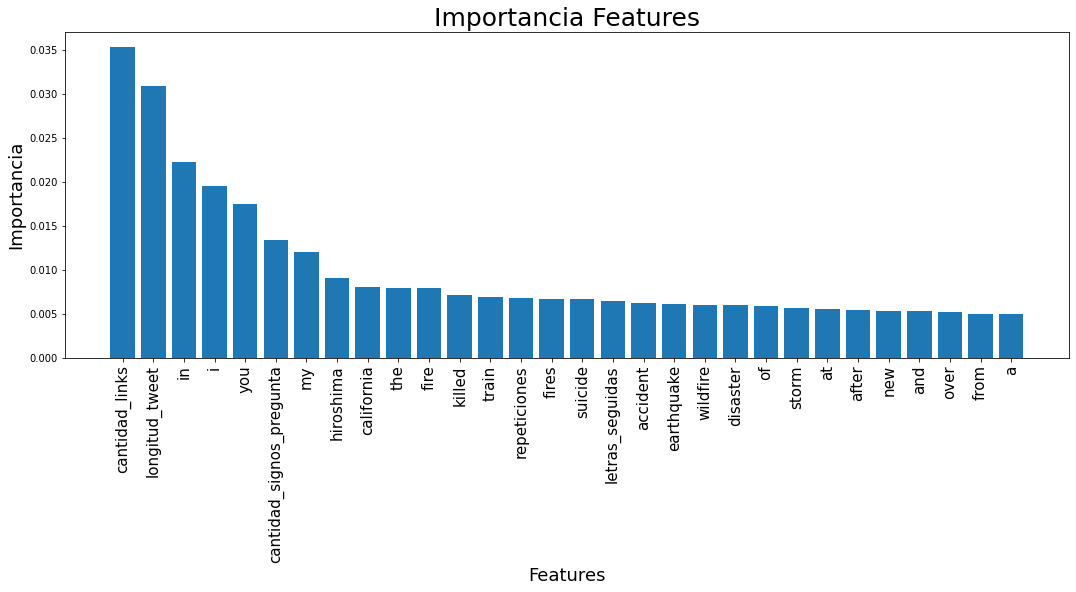

In [32]:
# Ploteo las features por importancia
#values_best_features,best_feaures
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(best_feaures, values_best_features)
plt.xlabel('Features',size=18)
plt.ylabel('Importancia',size=18)
plt.xticks(rotation=90, size=15)
plt.title('Importancia Features',size=25)
plt.show()

### Logré aumentar un poco el error de entrenamiento asegurandome de no overfittear

In [ ]:
#Habia conseguido que funcione metiendole el pip install acá mismo en lugar de desde la terminal
from bayes_opt import BayesianOptimization

In [ ]:
rf= RandomForestClassifier(n_estimators=50)
rf
#rf.fit(x_train, y_train)

In [ ]:
def evaluador_modelo(n_estimatorss):
    x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)
    print(int(n_estimatorss))
    rf= RandomForestClassifier(n_estimators=best_value, min_weight_fraction_leaf=n_estimatorss)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    
    return(f1_score(y_test.values, pred, average='macro'))
    
    
RandomForestClassifier()

In [ ]:
pbound = {
    'n_estimatorss':  (1,4)
}

#pbound={"n_estimatorss": [int, (1, 100)]},

optimizer = BayesianOptimization(
    f=evaluador_modelo,
    pbounds=pbound,
    verbose=1,
    random_state=1,
)

In [ ]:
optimizer.maximize(init_points=10, n_iter=10)